In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [23]:
df = pd.read_csv('dataset/college_data.csv')
df.describe()

/var/folders/45/xrxp1w5d28gfw_8gw1_nzk8w0000gn/T/ipykernel_30022/2627796030.py:1: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/college_data.csv')


,UNITID,LOCALE,LATITUDE,LONGITUDE,ADM_RATE_ALL,PPTUG_EF,SAT_AVG_ALL,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,MEDIAN_HH_INC,MN_EARN_WNE_INDEP0_P10,MN_EARN_WNE_INDEP1_P10,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,year
count,5.812300e+04,4110.000000,4110.000000,4110.000000,58123.000000,55491.000000,32424.000000,27970.000000,48634.000000,47855.000000,10650.000000,12925.000000,13088.000000,34930.000000,34930.000000,34930.000000,34930.000000,34930.000000,34930.000000,34930.000000,55613.000000,55613.000000,58123.000000
mean,9.344027e+05,19.850122,38.128463,-87.463017,0.698748,0.157509,1081.105848,32226.180050,17326.286836,19962.788737,60619.785343,43763.582205,45842.687958,0.505761,0.128000,0.113778,0.034668,0.006990,0.003314,0.023997,0.027307,0.054111,2010.749755
std,4.143870e+06,9.491830,5.654605,16.886849,0.211229,0.186372,133.742429,14743.123314,12077.494504,11150.330149,12218.234423,12227.124588,15545.882763,0.305167,0.182804,0.178621,0.060486,0.033861,0.027959,0.028004,0.059709,0.106795,6.250741
min,1.006540e+05,-3.000000,6.909759,-158.056403,0.014241,0.000000,514.000000,3655.000000,0.000000,0.000000,15821.290000,15700.000000,13100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000
25%,1.632860e+05,12.000000,34.935521,-94.299077,0.569700,0.015100,991.000000,20760.500000,8000.000000,12060.000000,53171.257500,36500.000000,36200.000000,0.262325,0.021500,0.019000,0.003300,0.000000,0.000000,0.000000,0.000000,0.001200,2005.000000
50%,2.032340e+05,21.000000,39.908070,-83.715417,0.725900,0.094100,1066.000000,28533.500000,14196.000000,17652.000000,60564.510000,42200.000000,44300.000000,0.583150,0.062500,0.056000,0.014900,0.002300,0.000500,0.019500,0.008900,0.021300,2010.000000
75%,2.434430e+05,23.000000,41.718277,-76.155959,0.855000,0.229400,1152.000000,41699.750000,23950.000000,25891.000000,68741.995000,48900.000000,52300.000000,0.754300,0.150900,0.124400,0.037600,0.005400,0.001900,0.035800,0.030600,0.060800,2016.000000
max,4.957672e+07,43.000000,64.857560,158.158189,1.000000,1.000000,1599.000000,81531.000000,66064.000000,66064.000000,102459.700000,145600.000000,224600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999500,0.819700,1.000000,1.000000,2022.000000


In [24]:
df.shape

(58123, 33)

In [25]:
pd.set_option('display.max_columns', None)
df.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,REGION,PREDDEG,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,ADM_RATE_ALL,PPTUG_EF,SAT_AVG_ALL,COSTT4_A,CONTROL,TUITIONFEE_IN,TUITIONFEE_OUT,MEDIAN_HH_INC,MN_EARN_WNE_INDEP0_P10,MN_EARN_WNE_INDEP1_P10,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,year
0,100654,Alabama A & M University,Normal,AL,35762,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Predominantly bachelor's-degree granting,NaN,NaN,NaN,NaN,NaN,NaN,0.7505,0.0764,970.0,NaN,Public,4664.0,5200.0,48006.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0402,0.0017,2001
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Predominantly bachelor's-degree granting,NaN,NaN,NaN,NaN,NaN,NaN,0.9098,0.2801,1030.0,NaN,Public,3640.0,6610.0,53894.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0330,0.0255,2001
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Predominantly bachelor's-degree granting,NaN,NaN,NaN,NaN,NaN,NaN,0.8381,0.2689,1109.0,NaN,Public,3536.0,7430.0,56624.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0396,0.0000,2001
3,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Predominantly bachelor's-degree granting,NaN,NaN,NaN,NaN,NaN,NaN,0.7948,0.0982,1091.0,NaN,Public,3292.0,8912.0,54093.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0159,0.0000,2001
4,100858,Auburn University,Auburn,AL,36849,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Predominantly bachelor's-degree granting,NaN,NaN,NaN,NaN,NaN,NaN,0.7594,0.0906,1094.0,NaN,Public,3380.0,9900.0,57081.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0084,0.0016,2001


In [26]:
df.isnull().sum()

UNITID                        0
INSTNM                        0
CITY                          0
STABBR                        0
ZIP                           0
REGION                        1
PREDDEG                       0
LOCALE                    54013
LATITUDE                  54013
LONGITUDE                 54013
CCBASIC                   54013
CCUGPROF                  54013
CCSIZSET                  54013
ADM_RATE_ALL                  0
PPTUG_EF                   2632
SAT_AVG_ALL               25699
COSTT4_A                  30153
CONTROL                       4
TUITIONFEE_IN              9489
TUITIONFEE_OUT            10268
MEDIAN_HH_INC             47473
MN_EARN_WNE_INDEP0_P10    45198
MN_EARN_WNE_INDEP1_P10    45035
UGDS_WHITE                23193
UGDS_BLACK                23193
UGDS_HISP                 23193
UGDS_ASIAN                23193
UGDS_AIAN                 23193
UGDS_NHPI                 23193
UGDS_2MOR                 23193
UGDS_NRA                   2510
UGDS_UNK

In [33]:
null_counts = df.isnull().sum() # check num of null values in each column
columns_to_drop = null_counts[null_counts > 30000].index
columns_to_drop

Index(['LOCALE', 'LATITUDE', 'LONGITUDE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET',
       'COSTT4_A', 'MEDIAN_HH_INC', 'MN_EARN_WNE_INDEP0_P10',
       'MN_EARN_WNE_INDEP1_P10'],
      dtype='object')

In [34]:
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.shape

(58123, 23)

In [35]:
df_cleaned.columns

Index(['UNITID', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'REGION', 'PREDDEG',
       'ADM_RATE_ALL', 'PPTUG_EF', 'SAT_AVG_ALL', 'CONTROL', 'TUITIONFEE_IN',
       'TUITIONFEE_OUT', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN',
       'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'year'],
      dtype='object')

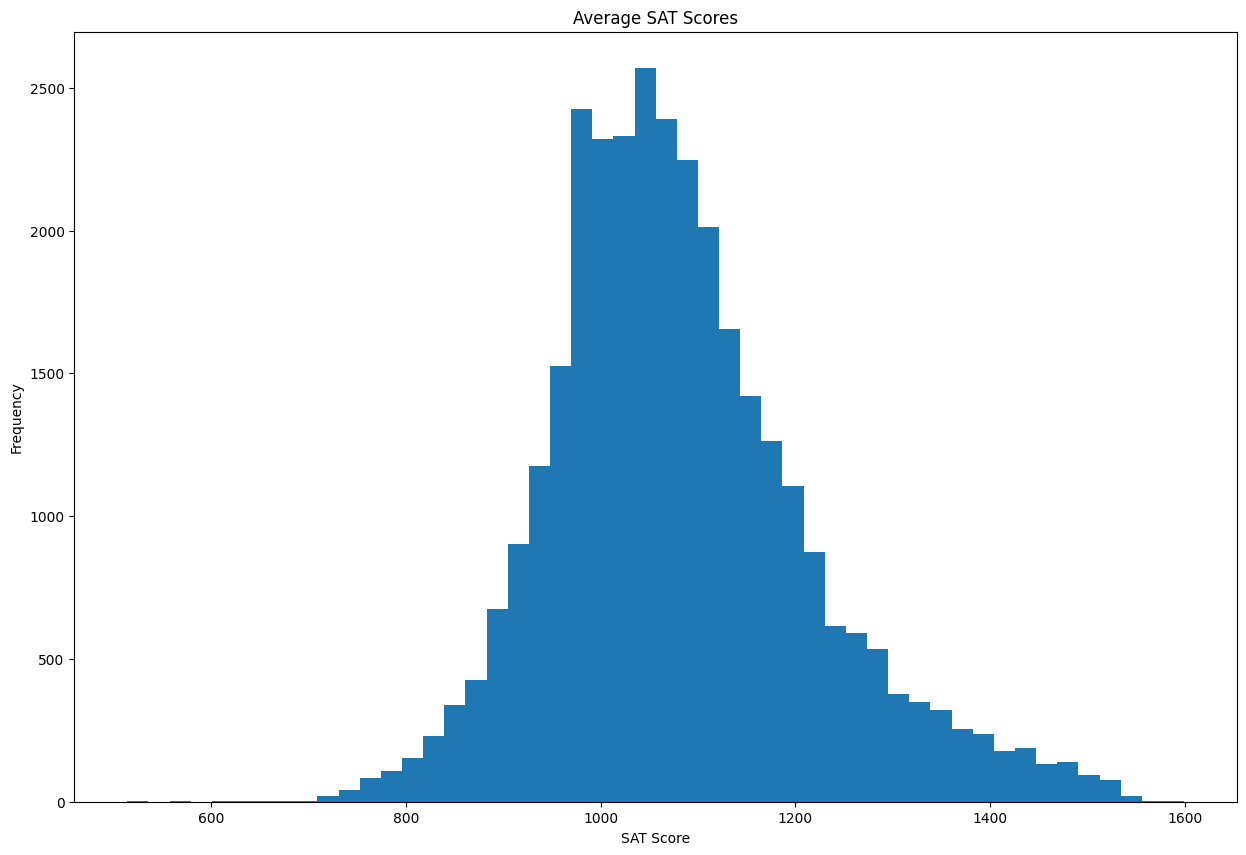

In [41]:
plt.figure(figsize=(15, 10))
plt.hist(df_cleaned['SAT_AVG_ALL'], bins=50)
plt.xlabel('SAT Score')
plt.ylabel('Frequency')
plt.title('Average SAT Scores')
plt.show()

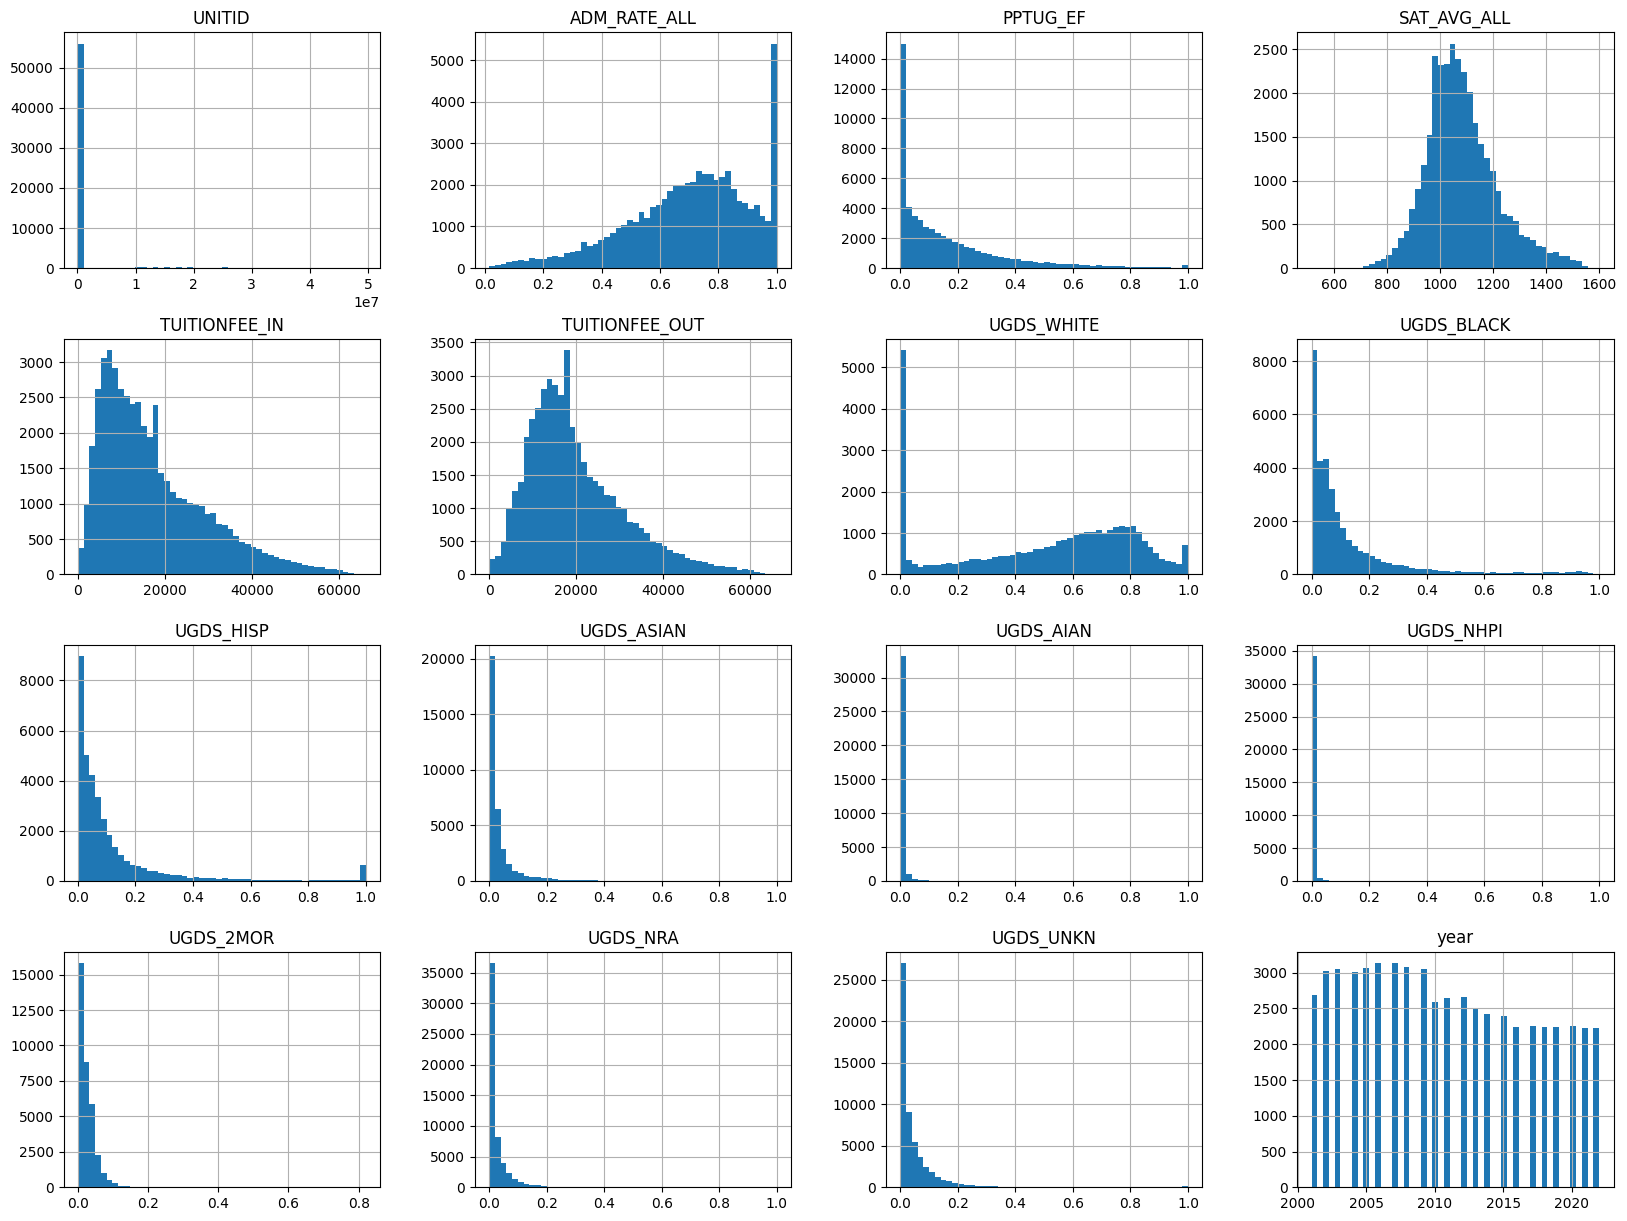

In [45]:
df_cleaned.hist(bins=50, figsize=(20, 15));